# Scikit-learn(https://scikit-learn.org/stable/)
---

- imple and efficient tools for predictive data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

## Example dataset: 
---
The iris dataset is a classic and very easy multi-class classification dataset.

| features name | unit |
|---|---|
| sepal length, 꽃 받침 길이 | cm
| sepal width, 꽃 받침 넓이 | cm
| petal length, 꽃잎 길이 | cm
| petal width, 꽃잎 넓이 | cm
| class | Setosa, Versicolour, Virginica |


![iris](https://thegoodpython.com/assets/images/iris-species.png)

## load datasets
---
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
Y = iris.target
target_names = iris.target_names

In [2]:
X.shape

(150, 4)

([], <a list of 0 Text yticklabel objects>)

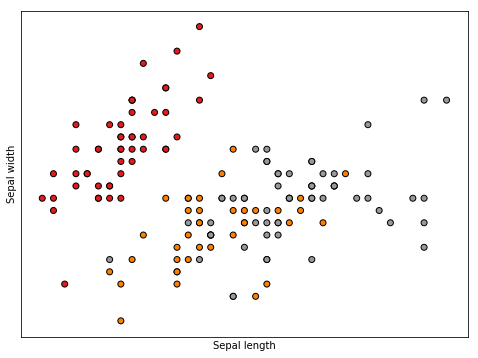

In [3]:
# sepal two features.
plt.figure(2, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

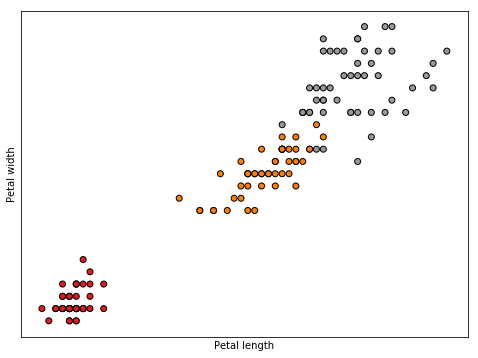

In [4]:
plt.figure(2, figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 3], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.xticks(())
plt.yticks(())

## Train/Test Split

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size=0.3)

print(X_tr.shape, Y_tr.shape)
print(X_ts.shape, Y_ts.shape)

(105, 4) (105,)
(45, 4) (45,)


## Ensemble method
---
1. sklearn.ensemble.BaggingClassifier
2. sklearn.ensemble.AdaBoostClassifier
3. sklearn.ensemble.GradientBoostingClassifier
4. sklearn.ensemble.StackingClassifier

### 1. Bagging
---
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
```python
class sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
```

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

knn = KNeighborsClassifier()
clf = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=123)
clf.fit(X_tr, Y_tr)
clf.score(X_ts, Y_ts)

0.9555555555555556

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_tr, Y_tr)
clf.score(X_ts, Y_ts)

0.9555555555555556

In [8]:
clf.decision_path

<bound method BaseForest.decision_path of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

### 2. AdaBoost
---
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier
```python
class sklearn.ensemble.AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
```

The most important parameters are base_estimator, n_estimators, and learning_rate


In [9]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=123)
clf.fit(X_tr, Y_tr)
clf.score(X_ts, Y_ts)

0.9777777777777777

In [10]:
from sklearn.svm import SVC
clf = AdaBoostClassifier(base_estimator=SVC(probability=True, gamma='auto'), n_estimators=100, random_state=123)
clf.fit(X_tr, Y_tr)
clf.score(X_ts, Y_ts)

0.9555555555555556

### 3. GradientBoosting
---
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
```python 
class sklearn.ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
```

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=50, random_state=123)
clf.fit(X_tr, Y_tr)
clf.score(X_ts, Y_ts)

0.9777777777777777

### 4. Stacking
---
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier
```python 
class sklearn.ensemble.StackingClassifier(estimators, final_estimator=None, cv=None, stack_method='auto', n_jobs=None, passthrough=False, verbose=0)
```

scikit-learn 0.22 version upgrade
```
pip install -U scikit-learn
```

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

#make pipeline
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=123)),
    ('svr', SVC(random_state=123)),
    ('knn', KNeighborsClassifier())
    ]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

clf.fit(X_tr, Y_tr)
clf.score(X_ts, Y_ts)

0.9555555555555556

In [12]:
clf.get_params

<bound method _BaseHeterogeneousEnsemble.get_params of StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min

In [15]:
clf.predict(X_ts)

array([0, 2, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1,
       1])

### google colab을 이용시 scikit-learn의 버전이 0.22보다 낮으므로 mlxtend(machine learning extensions) 모듈을 이용

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

#make estimators
knn = KNeighborsClassifier()

estimators = [RandomForestClassifier(n_estimators=10, random_state=123), SVC(gamma='auto', random_state=123), knn]
clf = StackingClassifier(classifiers=estimators, meta_classifier=LogisticRegression())

clf.fit(X_tr, Y_tr)
clf.score(X_ts, Y_ts)
```